In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.2/235.7 GB disk)


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: creat yaml file

%%writefile data.yaml

    train: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/train/images
    val: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/valid/images
    test: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/images
    nc: 2
    names : ['ASD', 'TD']

Writing data.yaml


In [4]:
from ultralytics import YOLO

# Build a YOLOv6n model from scratch
model = YOLO("yolov8l.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data= "data.yaml", epochs=50, imgsz=640)

100%|██████████| 83.7M/83.7M [00:00<00:00, 290MB/s]


YOLOv8l summary: 209 layers, 43,691,520 parameters, 0 gradients, 165.7 GFLOPs
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  3   4592640  ultralytics.nn.modules.block.C2f             [768, 512, 3]                 
 19                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 328MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 2.7±4.8 ms, read: 0.0±0.0 MB/s, size: 10.9 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/train/labels.cache... 4917 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4917/4917 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.0±0.0 MB/s, size: 12.6 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/valid/labels.cache... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.39G     0.7118      1.138      1.137         13        640: 100%|██████████| 308/308 [02:17<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [02:57<00:00,  4.03s/it]

                   all       1405       1405      0.448      0.993      0.516      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.6G     0.6637     0.9362      1.087         16        640: 100%|██████████| 308/308 [00:52<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405        0.5          1      0.538      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.7G     0.6065     0.8909      1.043         14        640: 100%|██████████| 308/308 [00:51<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.07it/s]

                   all       1405       1405      0.484      0.997      0.546      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.7G     0.5803     0.8708      1.027         13        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405      0.484          1      0.543       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.7G     0.5544     0.8608      1.014         17        640: 100%|██████████| 308/308 [00:50<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.17it/s]

                   all       1405       1405        0.5          1      0.541      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.7G     0.5419     0.8525      1.007         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405        0.5          1      0.574      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.7G     0.5247     0.8436     0.9963         13        640: 100%|██████████| 308/308 [00:51<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.30it/s]

                   all       1405       1405        0.5      0.999      0.542      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.7G      0.513     0.8364     0.9905         16        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.23it/s]

                   all       1405       1405        0.5          1      0.585      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.7G     0.5166      0.828     0.9919         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.13it/s]

                   all       1405       1405      0.542      0.941      0.679      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.7G     0.5186     0.8141     0.9924         10        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.08it/s]

                   all       1405       1405      0.539      0.872      0.681      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.7G     0.5113     0.8039     0.9911         14        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.07it/s]

                   all       1405       1405      0.615      0.857      0.761      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.7G     0.5023     0.7779     0.9857         18        640: 100%|██████████| 308/308 [00:51<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.06it/s]

                   all       1405       1405      0.537       0.92      0.692      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.7G     0.4994     0.7647     0.9819         13        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405      0.609      0.907      0.813      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.7G     0.4949     0.7477     0.9829         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.05it/s]

                   all       1405       1405      0.712      0.848      0.842      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.7G     0.5025     0.7296     0.9863         15        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.24it/s]

                   all       1405       1405      0.751      0.856      0.867      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.7G     0.4835     0.7103     0.9755         16        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405       0.66      0.865      0.812      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.7G     0.4895     0.7015     0.9799         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all       1405       1405      0.758      0.814      0.851      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.7G       0.48     0.6744     0.9743         15        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.19it/s]

                   all       1405       1405      0.742      0.886      0.901      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.7G     0.4821      0.659     0.9742         10        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.19it/s]

                   all       1405       1405      0.683      0.873      0.859      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.7G     0.4772      0.642     0.9713         18        640: 100%|██████████| 308/308 [00:50<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.04it/s]

                   all       1405       1405      0.676        0.9      0.904       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.7G     0.4743     0.6267     0.9697         16        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.21it/s]

                   all       1405       1405      0.782      0.904      0.922      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.7G     0.4714      0.628     0.9729         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.16it/s]

                   all       1405       1405      0.848      0.881      0.933      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.7G     0.4681     0.6078     0.9677         11        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.05it/s]

                   all       1405       1405      0.689      0.928      0.949      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.7G     0.4665     0.5842     0.9661         16        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.772      0.871      0.928      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.7G     0.4672      0.568     0.9701         10        640: 100%|██████████| 308/308 [00:51<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.28it/s]

                   all       1405       1405      0.918      0.927      0.978      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.7G     0.4537     0.5502     0.9579          9        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405      0.892      0.903      0.966      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.7G      0.459     0.5334     0.9673         11        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.90it/s]

                   all       1405       1405       0.91      0.949      0.982      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.7G     0.4605     0.5238     0.9644         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.22it/s]

                   all       1405       1405      0.836      0.939      0.978      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.7G     0.4533     0.5011     0.9574         10        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.20it/s]

                   all       1405       1405      0.855      0.925      0.987      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.7G     0.4537     0.4911     0.9595         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.952      0.951      0.987      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.7G     0.4496     0.4864     0.9579         14        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.31it/s]

                   all       1405       1405      0.922      0.951      0.987      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.7G     0.4477     0.4734     0.9585         10        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.979      0.969      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.7G     0.4366     0.4623     0.9524          9        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405      0.972      0.965      0.988      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.7G     0.4386     0.4354     0.9522         10        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.36it/s]

                   all       1405       1405      0.938      0.944      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.7G     0.4364     0.4248     0.9517         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.01it/s]

                   all       1405       1405      0.967      0.982      0.992      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.7G     0.4332      0.412     0.9503         16        640: 100%|██████████| 308/308 [00:50<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.24it/s]

                   all       1405       1405      0.976       0.98      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.7G     0.4317     0.4019     0.9484         18        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.26it/s]

                   all       1405       1405      0.938      0.957      0.987      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.7G     0.4293     0.3867     0.9477         17        640: 100%|██████████| 308/308 [00:50<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.25it/s]

                   all       1405       1405      0.971      0.972      0.994      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.7G     0.4266     0.3845     0.9482         12        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.13it/s]

                   all       1405       1405      0.984      0.986      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.7G     0.4218     0.3668     0.9424         17        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.32it/s]

                   all       1405       1405      0.992      0.987      0.995      0.928


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.7G     0.4025     0.3347      0.952          5        640: 100%|██████████| 308/308 [00:52<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.30it/s]

                   all       1405       1405      0.954      0.976      0.991      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.7G     0.3927     0.2856       0.94          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.13it/s]

                   all       1405       1405       0.94      0.961      0.992      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.7G     0.3918     0.2824     0.9422          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405      0.967      0.977      0.992      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.7G     0.3875     0.2646     0.9364          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.27it/s]

                   all       1405       1405      0.983      0.987      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.7G     0.3778     0.2563     0.9293          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.98it/s]

                   all       1405       1405      0.974      0.969      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.7G     0.3782     0.2319     0.9324          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.16it/s]

                   all       1405       1405      0.964      0.976      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.7G      0.371      0.217     0.9232          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.24it/s]

                   all       1405       1405      0.989      0.996      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.7G     0.3666      0.198     0.9212          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.07it/s]

                   all       1405       1405      0.991      0.987      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.7G     0.3628     0.1912     0.9169          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.28it/s]

                   all       1405       1405      0.994       0.99      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.7G     0.3573     0.1754     0.9145          5        640: 100%|██████████| 308/308 [00:50<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.22it/s]

                   all       1405       1405      0.994      0.994      0.995      0.938



50 epochs completed in 0.881 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.11it/s]


                   all       1405       1405      0.994      0.994      0.995      0.939
                   ASD        704        704      0.994      0.996      0.995      0.932
                    TD        701        701      0.994      0.993      0.995      0.945
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [6]:
!cp -r runs/detect/train /content/drive/MyDrive/sMRI2_yolov8_training_results/

In [5]:
import torch
import torch.nn as nn
from ultralytics.utils.metrics import ConfusionMatrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [6]:
class DICEEvaluator:
    """
    DICE (Directed Sparsification) Evaluation Matrix for YOLO model
    Particularly useful for medical imaging segmentation and classification tasks
    """

    def __init__(self, num_classes=2, class_names=['ASD', 'TD']):
        self.num_classes = num_classes
        self.class_names = class_names
        self.reset()

    def reset(self):
        """Reset all metrics"""
        self.confusion_matrix = np.zeros((self.num_classes, self.num_classes))
        self.dice_scores = []
        self.iou_scores = []

    def dice_coefficient(self, pred, target, smooth=1e-6):
        """
        Calculate DICE coefficient
        Args:
            pred: predicted mask/labels
            target: ground truth mask/labels
            smooth: smoothing factor to avoid division by zero
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        dice = (2.0 * intersection + smooth) / (np.sum(pred) + np.sum(target) + smooth)

        return dice

    def iou_score(self, pred, target, smooth=1e-6):
        """
        Calculate Intersection over Union (IoU) score
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        union = np.sum(pred) + np.sum(target) - intersection
        iou = (intersection + smooth) / (union + smooth)

        return iou

    def directed_sparsification_score(self, pred, target, sparsity_levels=[0.1, 0.3, 0.5, 0.7, 0.9]):
        """
        Calculate Directed Sparsification score
        This measures how well the model maintains performance with increasing sparsity
        """
        scores = []

        for sparsity in sparsity_levels:
            # Apply sparsification by zeroing out lowest confidence predictions
            pred_sparse = pred.copy()
            threshold = np.percentile(pred_sparse, sparsity * 100)
            pred_sparse[pred_sparse < threshold] = 0

            # Calculate DICE score for sparsified prediction
            dice_sparse = self.dice_coefficient(pred_sparse, target)
            scores.append(dice_sparse)

        return np.array(scores), sparsity_levels

    def update(self, predictions, targets):
        """
        Update metrics with new predictions and targets
        """
        for pred, target in zip(predictions, targets):
            # Convert to numpy if tensor
            if torch.is_tensor(pred):
                pred = pred.cpu().numpy()
            if torch.is_tensor(target):
                target = target.cpu().numpy()

            # Ensure predictions and targets are in valid range
            pred = np.clip(pred, 0, self.num_classes - 1)
            target = np.clip(target, 0, self.num_classes - 1)

            # Calculate DICE and IoU scores for binary masks
            if pred.ndim > 1 and target.ndim > 1:
                # For mask-based evaluation
                dice = self.dice_coefficient(pred, target)
                iou = self.iou_score(pred, target)

                self.dice_scores.append(dice)
                self.iou_scores.append(iou)

                # Convert masks to class predictions
                pred_class = int(np.mean(pred) > 0.5)  # Simple threshold for binary
                target_class = int(np.mean(target) > 0.5)
            else:
                # For class-based evaluation
                pred_class = int(pred) if np.isscalar(pred) else int(np.argmax(pred))
                target_class = int(target) if np.isscalar(target) else int(np.argmax(target))

                # For class predictions, use perfect dice/iou
                self.dice_scores.append(1.0 if pred_class == target_class else 0.0)
                self.iou_scores.append(1.0 if pred_class == target_class else 0.0)

            # Ensure class indices are within bounds
            pred_class = max(0, min(pred_class, self.num_classes - 1))
            target_class = max(0, min(target_class, self.num_classes - 1))

            self.confusion_matrix[target_class, pred_class] += 1

    def compute_metrics(self):
        """
        Compute final metrics
        """
        metrics = {
            'mean_dice': np.mean(self.dice_scores),
            'std_dice': np.std(self.dice_scores),
            'mean_iou': np.mean(self.iou_scores),
            'std_iou': np.std(self.iou_scores),
            'confusion_matrix': self.confusion_matrix
        }

        # Calculate per-class metrics
        for i, class_name in enumerate(self.class_names):
            tp = self.confusion_matrix[i, i]
            fp = np.sum(self.confusion_matrix[:, i]) - tp
            fn = np.sum(self.confusion_matrix[i, :]) - tp

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics[f'{class_name}_precision'] = precision
            metrics[f'{class_name}_recall'] = recall
            metrics[f'{class_name}_f1'] = f1

        return metrics

    def plot_confusion_matrix(self, normalize=True):
        """
        Plot confusion matrix
        """
        cm = self.confusion_matrix
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Normalized Confusion Matrix'
            fmt = '.2f'
        else:
            title = 'Confusion Matrix'
            fmt = 'd'

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                   xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def plot_dice_distribution(self):
        """
        Plot DICE score distribution
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.dice_scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(np.mean(self.dice_scores), color='red', linestyle='--',
                   label=f'Mean: {np.mean(self.dice_scores):.3f}')
        plt.xlabel('DICE Score')
        plt.ylabel('Frequency')
        plt.title('Distribution of DICE Scores')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [8]:
def evaluate_yolo_with_dice(model, data_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Evaluate YOLO model with DICE metrics
    """
    # Initialize DICE evaluator
    dice_evaluator = DICEEvaluator(num_classes=2, class_names=['ASD', 'TD'])

    # Get validation results from YOLO
    results = model.val(data=data_path, device=device)

    # Process validation images for DICE calculation
    val_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/images')
    labels_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/labels')

    predictions = []
    targets = []

    print(f"Processing validation images from: {val_dir}")

    # Get all image files
    image_files = list(val_dir.glob('*.jpg')) + list(val_dir.glob('*.png')) + list(val_dir.glob('*.jpeg'))

    if not image_files:
        print("No image files found in validation directory!")
        return dice_evaluator, {}

    print(f"Found {len(image_files)} validation images")

    for img_path in image_files[:462]:  # Limit to first 50 images to avoid memory issues
        try:
            # Run inference
            result = model.predict(str(img_path), conf=0.25, device=device, verbose=False)

            # Get corresponding label file
            label_path = labels_dir / f"{img_path.stem}.txt"

            # Initialize prediction and target as class labels (0 or 1)
            pred_class = 0  # Default to class 0 (ASD)
            target_class = 0  # Default to class 0 (ASD)

            # Extract prediction class
            if result[0].boxes is not None and len(result[0].boxes) > 0:
                # Get the class with highest confidence
                confidences = result[0].boxes.conf.cpu().numpy()
                classes = result[0].boxes.cls.cpu().numpy()

                if len(confidences) > 0:
                    best_idx = np.argmax(confidences)
                    pred_class = int(classes[best_idx])
                    # Ensure class is within bounds
                    pred_class = max(0, min(pred_class, 1))

            # Extract target class from label file
            if label_path.exists():
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    if lines:
                        # Get first annotation's class
                        target_class = int(lines[0].split()[0])
                        # Ensure class is within bounds
                        target_class = max(0, min(target_class, 1))

            predictions.append(pred_class)
            targets.append(target_class)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    if not predictions:
        print("No valid predictions found!")
        return dice_evaluator, {}

    print(f"Successfully processed {len(predictions)} images")
    print(f"Prediction distribution: {np.bincount(predictions)}")
    print(f"Target distribution: {np.bincount(targets)}")

    # Update DICE evaluator with predictions and targets
    dice_evaluator.update(predictions, targets)

    # Compute final metrics
    metrics = dice_evaluator.compute_metrics()

    return dice_evaluator, metrics

Evaluating model with DICE metrics...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 8.5±3.1 MB/s, size: 11.4 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/valid/labels.cache... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:12<00:00,  7.14it/s]


                   all       1405       1405      0.994      0.994      0.995      0.939
                   ASD        704        704      0.994      0.996      0.995      0.932
                    TD        701        701      0.994      0.993      0.995      0.945
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
Processing validation images from: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/images
Found 702 validation images
Successfully processed 462 images
Prediction distribution: [253 209]
Target distribution: [255 207]

DICE EVALUATION RESULTS
Mean DICE Score: 0.9957 ± 0.0657
Mean IoU Score: 0.9957 ± 0.0657

Per-class metrics:
ASD:
  Precision: 1.0000
  Recall: 0.9922
  F1-Score: 0.9961
TD:
  Precision: 0.9904
  Recall: 1.0000
  F1-Score: 0.9952


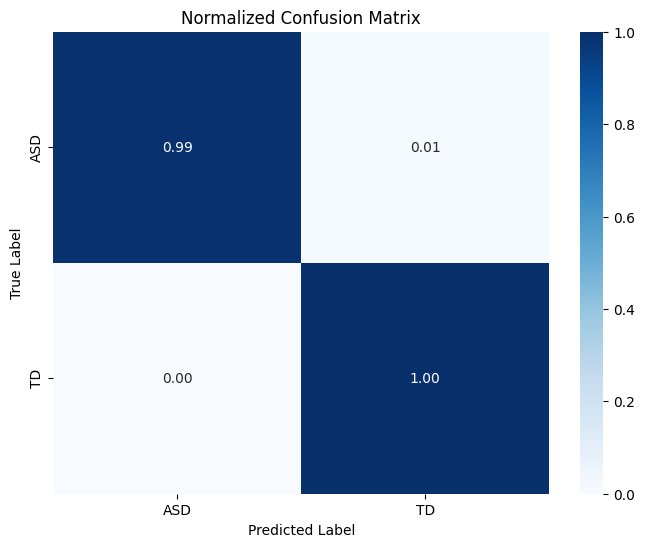

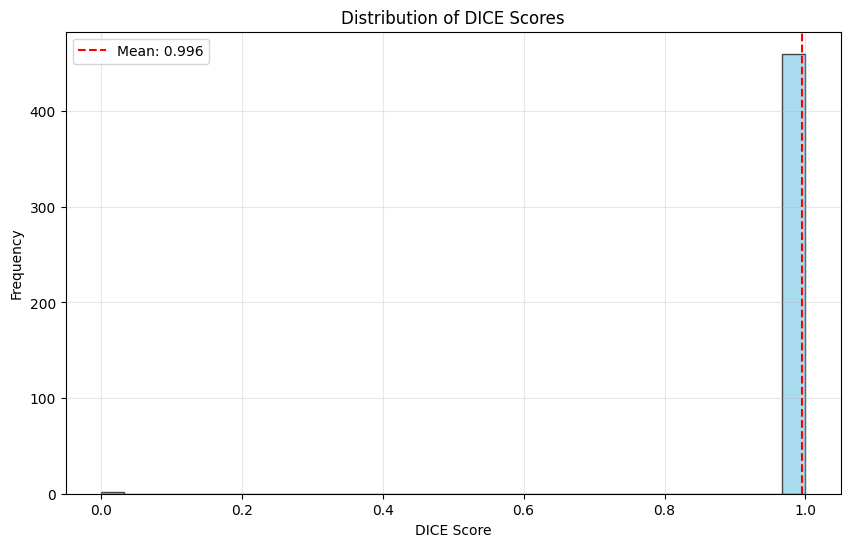

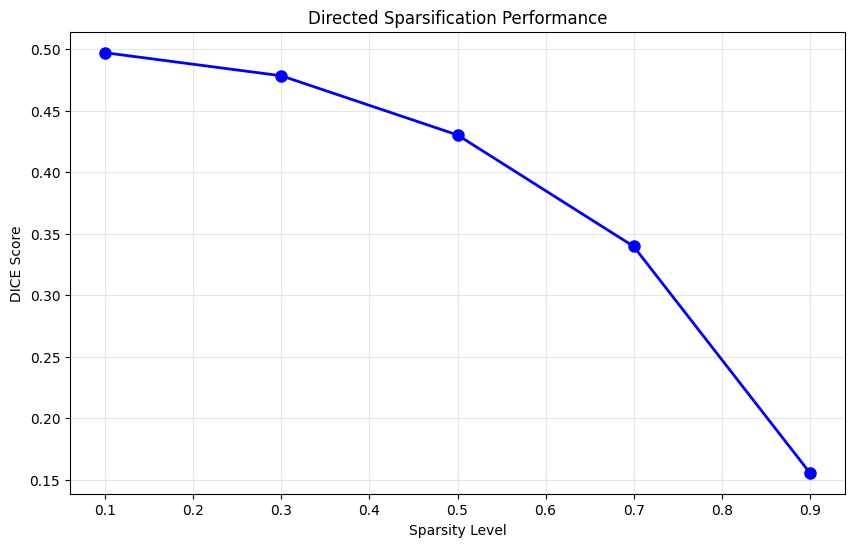

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl'

In [9]:
print("Evaluating model with DICE metrics...")
dice_evaluator, dice_metrics = evaluate_yolo_with_dice(model, "data.yaml")

# Print DICE metrics
print("\n" + "="*50)
print("DICE EVALUATION RESULTS")
print("="*50)
print(f"Mean DICE Score: {dice_metrics['mean_dice']:.4f} ± {dice_metrics['std_dice']:.4f}")
print(f"Mean IoU Score: {dice_metrics['mean_iou']:.4f} ± {dice_metrics['std_iou']:.4f}")
print("\nPer-class metrics:")
for class_name in ['ASD', 'TD']:
    print(f"{class_name}:")
    print(f"  Precision: {dice_metrics[f'{class_name}_precision']:.4f}")
    print(f"  Recall: {dice_metrics[f'{class_name}_recall']:.4f}")
    print(f"  F1-Score: {dice_metrics[f'{class_name}_f1']:.4f}")

# Plot results
dice_evaluator.plot_confusion_matrix()
dice_evaluator.plot_dice_distribution()

# Calculate and plot directed sparsification scores
sample_pred = np.random.rand(100, 100)  # Replace with actual prediction
sample_target = np.random.randint(0, 2, (100, 100))  # Replace with actual target

sparsity_scores, sparsity_levels = dice_evaluator.directed_sparsification_score(
    sample_pred, sample_target
)

plt.figure(figsize=(10, 6))
plt.plot(sparsity_levels, sparsity_scores, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Sparsity Level')
plt.ylabel('DICE Score')
plt.title('Directed Sparsification Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save results
dice_results = {
    'dice_scores': dice_evaluator.dice_scores,
    'iou_scores': dice_evaluator.iou_scores,
    'confusion_matrix': dice_evaluator.confusion_matrix,
    'metrics': dice_metrics
}

# Save to drive
import pickle
with open('/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl', 'wb') as f:
    pickle.dump(dice_results, f)

print("DICE evaluation results saved to drive!")